In [1]:
import numpy as np
import pandas as pd
import os
import json
import h5py
import sys
import pdb
import argparse
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
import seaborn as sns

import print_per_user_conf_mat
import data_utils


%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


Populating the interactive namespace from numpy and matplotlib


File stats- F1: 0.496282484823, Kappa: 0.32418223025, Wt-F1: 0.845568023396

===== Confusion matrix =====
[[15635  1982  1002   546]
 [  131  1020    21     0]
 [   95     0   123     0]
 [  226     0    28   305]]


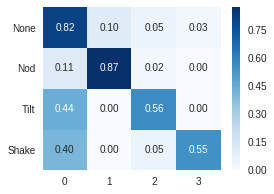

In [18]:
conf = np.zeros((5, 5))

conf = np.array(
[[15635,  1982,  1002,   546],
         [  131,  1020,    21,     0],
         [   95,     0,   123,     0],
         [  226,     0,    28,   305]],
)
    
def plot_conf(norm_conf):
    # Plot using seaborn
    # (this is style I used for ResNet matrix)
    df_cm = pd.DataFrame(norm_conf)
    plt.figure(figsize = (4,3))
    labels = ['None', 'Nod', 'Tilt', 'Shake']
    sns.heatmap(df_cm, annot=True, cmap='Blues', yticklabels=labels, fmt=".2f")
    
    # This sets the yticks "upright" with 0, as opposed to sideways with 90.
    plt.yticks(rotation=0)
    
    plt.show()
    

norm_conf = data_utils.normalize_conf(conf)
f1_score = data_utils.get_f1_score(conf, weights=[1.,1.,1.,1.])
wt_f1 = data_utils.computeWeightedF1(conf)
kappa_score = data_utils.computeKappa(conf)
print('File stats- F1: {}, Kappa: {}, Wt-F1: {}'.format(f1_score, kappa_score, wt_f1))
print_per_user_conf_mat.print_conf_matrix(conf)
plot_conf(norm_conf)

<Container object of 10 artists>

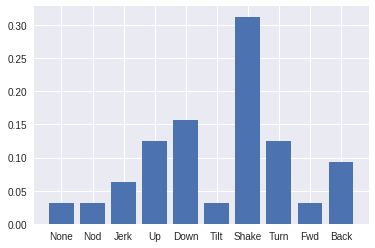

In [3]:
data = np.array(
    [1, 1, 2, 4, 5, 1, 10, 4, 1, 3]
)
data = data / float(np.sum(data))
ticks = ['None', 'Nod', 'Jerk', 'Up', 'Down', 'Tilt', 'Shake', 'Turn', 'Fwd', 'Back']
plt.bar(range(len(data)), data, tick_label=ticks, orientation='vertical', align='center')